<a href="https://colab.research.google.com/github/camilotorron/TestNotebooks/blob/main/StravaRouteAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
!pip3 install gpxpy
!pip3 install haversine

In [97]:
import gpxpy
import gpxpy.gpx
import pandas as pd
import matplotlib.pyplot as plt
import folium
import haversine as hs
import numpy as np

In [5]:
with open('/content/Morning_Ride.gpx', 'r', encoding='utf-8') as gpx_file:
  gpx = gpxpy.parse(gpx_file)

In [6]:
type(gpx)

gpxpy.gpx.GPX

In [7]:
route_info = []

for track in gpx.tracks:
  for segment in track.segments:
    for point in segment.points:
      route_info.append({
          'latitude': point.latitude,
          'longitude': point.longitude,
          'elevation': point.elevation,
          'time': point.time
      })

In [8]:
len(route_info)

16491

In [13]:
type(route_info[0]['time'])

datetime.datetime

In [32]:
df= pd.DataFrame(route_info)
df.head()

,latitude,longitude,elevation,time
0,27.763399,-15.571075,46.0,2022-02-26 09:11:53+00:00
1,27.763393,-15.571089,51.0,2022-02-26 09:11:54+00:00
2,27.763375,-15.571099,51.4,2022-02-26 09:11:55+00:00
3,27.763375,-15.571099,51.0,2022-02-26 09:11:56+00:00
4,27.763373,-15.571105,50.8,2022-02-26 09:11:57+00:00


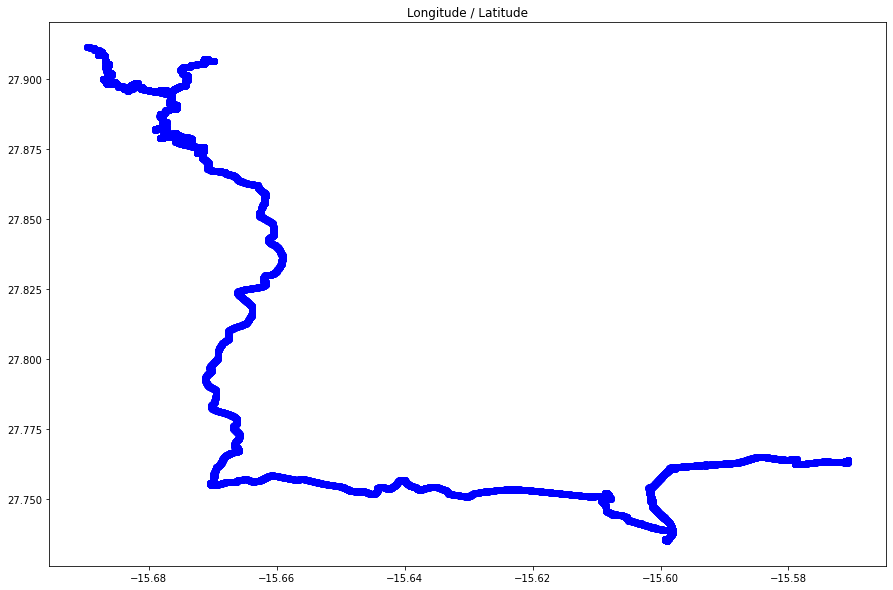

In [41]:
plt.figure(figsize=(15,10))
plt.title('Longitude / Latitude')
plt.scatter(df['longitude'], df['latitude'], color = 'blue')

In [35]:
lista = []

for t in df['time']:
  lista.append(t.timestamp())

In [36]:
df['time'] = lista
df[:10]

,latitude,longitude,elevation,time
0,27.763399,-15.571075,46.0,1.645867e+09
1,27.763393,-15.571089,51.0,1.645867e+09
2,27.763375,-15.571099,51.4,1.645867e+09
3,27.763375,-15.571099,51.0,1.645867e+09
4,27.763373,-15.571105,50.8,1.645867e+09
5,27.763376,-15.571100,50.6,1.645867e+09
6,27.763378,-15.571095,49.4,1.645867e+09
7,27.763377,-15.571088,49.4,1.645867e+09
8,27.763374,-15.571085,48.4,1.645867e+09
9,27.763365,-15.571089,49.8,1.645867e+09


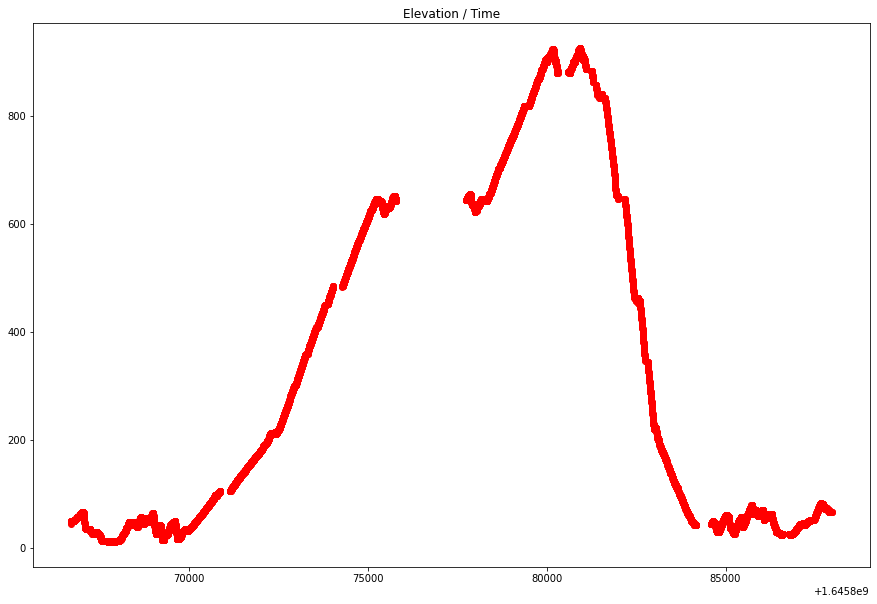

In [40]:
plt.figure(figsize=(15,10))
plt.title('Elevation / Time')
plt.scatter(df['time'], df['elevation'], color = 'red')

In [73]:
mapa = folium.Map(
    location = [27.85, -15.61],
    tiles = 'OpenStreetMap',
    zoom_start = 11,
    width = 1300,
    height = 900
)
coordenadas = [tuple(x) for x in df[['latitude','longitude']].to_numpy()]
folium.PolyLine(coordenadas, weight = 6).add_to(mapa)
display(mapa)

In [78]:
df['elevation_gain'] = df['elevation'].diff()
df[:10]

,latitude,longitude,elevation,time,elevation_gain
0,27.763399,-15.571075,46.0,1.645867e+09,NaN
1,27.763393,-15.571089,51.0,1.645867e+09,5.0
2,27.763375,-15.571099,51.4,1.645867e+09,0.4
3,27.763375,-15.571099,51.0,1.645867e+09,-0.4
4,27.763373,-15.571105,50.8,1.645867e+09,-0.2
5,27.763376,-15.571100,50.6,1.645867e+09,-0.2
6,27.763378,-15.571095,49.4,1.645867e+09,-1.2
7,27.763377,-15.571088,49.4,1.645867e+09,0.0
8,27.763374,-15.571085,48.4,1.645867e+09,-1.0
9,27.763365,-15.571089,49.8,1.645867e+09,1.4


In [83]:
total_elevation = 0
for e in df['elevation_gain']:
  if e>0:
    total_elevation=total_elevation+e
 
print('Total elevation gain: '+ str(total_elevation)+' meters')

Total elevation gain: 1541.6000000000647 meters


In [103]:
def calcula_distancia(lo1, la1, lo2, la2) -> float:
  dist = hs.haversine(
      point1 = (la1, lo1),
      point2 = (la2, lo2),
      unit = hs.Unit.METERS
  )
  return np.round(dist,2)

In [107]:
distancias = [0]
for i in range(1,len(df)):
  la_act = df.iloc[i]['latitude']
  lo_act = df.iloc[i]['longitude']
  la_ant = df.iloc[i-1]['latitude']  
  lo_ant = df.iloc[i-1]['longitude']
  distancia = calcula_distancia(lo_act,la_act,lo_ant,la_ant)
  distancias.append(distancia)

In [110]:
df['distance_diff'] = distancias
df[:10]

,latitude,longitude,elevation,time,elevation_gain,distance_diff
0,27.763399,-15.571075,46.0,1.645867e+09,NaN,0.00
1,27.763393,-15.571089,51.0,1.645867e+09,5.0,1.53
2,27.763375,-15.571099,51.4,1.645867e+09,0.4,2.23
3,27.763375,-15.571099,51.0,1.645867e+09,-0.4,0.00
4,27.763373,-15.571105,50.8,1.645867e+09,-0.2,0.63
5,27.763376,-15.571100,50.6,1.645867e+09,-0.2,0.59
6,27.763378,-15.571095,49.4,1.645867e+09,-1.2,0.54
7,27.763377,-15.571088,49.4,1.645867e+09,0.0,0.70
8,27.763374,-15.571085,48.4,1.645867e+09,-1.0,0.45
9,27.763365,-15.571089,49.8,1.645867e+09,1.4,1.08


In [112]:
current_distance = []
num = 0
for e in distancias:
  num = e + num
  current_distance.append(num)
df['current_distance'] = current_distance
df[:30]

,latitude,longitude,elevation,time,elevation_gain,distance_diff,current_distance
0,27.763399,-15.571075,46.0,1.645867e+09,NaN,0.00,0.00
1,27.763393,-15.571089,51.0,1.645867e+09,5.0,1.53,1.53
2,27.763375,-15.571099,51.4,1.645867e+09,0.4,2.23,3.76
3,27.763375,-15.571099,51.0,1.645867e+09,-0.4,0.00,3.76
4,27.763373,-15.571105,50.8,1.645867e+09,-0.2,0.63,4.39
5,27.763376,-15.571100,50.6,1.645867e+09,-0.2,0.59,4.98
6,27.763378,-15.571095,49.4,1.645867e+09,-1.2,0.54,5.52
7,27.763377,-15.571088,49.4,1.645867e+09,0.0,0.70,6.22
8,27.763374,-15.571085,48.4,1.645867e+09,-1.0,0.45,6.67
9,27.763365,-15.571089,49.8,1.645867e+09,1.4,1.08,7.75


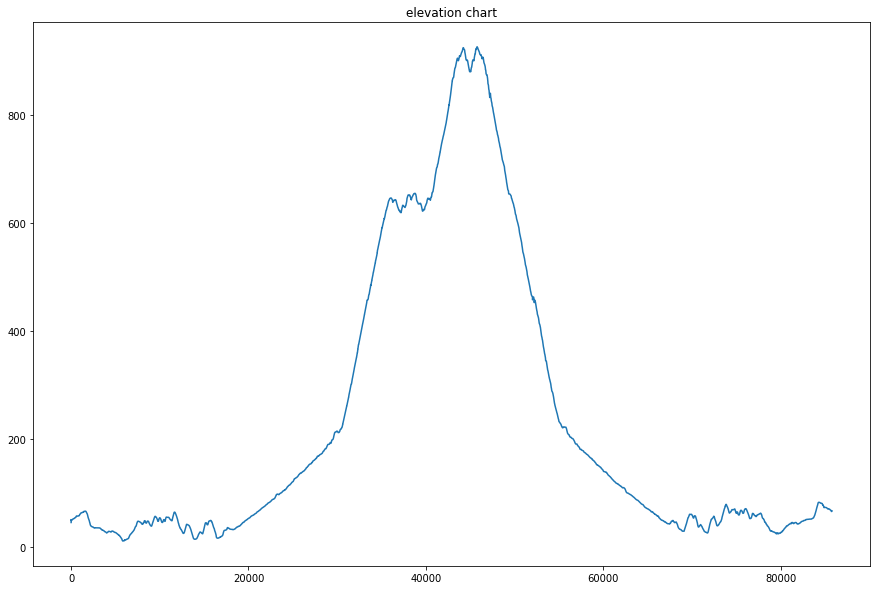

In [116]:
plt.figure(figsize = (15,10))
plt.plot( df['current_distance'],df['elevation'])
plt.title('elevation chart')
plt.show()

In [122]:
df['speed'] = df['distance_diff']*(3.6)
df['time_diff'] = df['time'].diff()

In [127]:
df = df.drop('time_diff', axis = 1)
df[:10]

,latitude,longitude,elevation,time,elevation_gain,distance_diff,current_distance,speed
0,27.763399,-15.571075,46.0,1.645867e+09,NaN,0.00,0.00,0.000
1,27.763393,-15.571089,51.0,1.645867e+09,5.0,1.53,1.53,5.508
2,27.763375,-15.571099,51.4,1.645867e+09,0.4,2.23,3.76,8.028
3,27.763375,-15.571099,51.0,1.645867e+09,-0.4,0.00,3.76,0.000
4,27.763373,-15.571105,50.8,1.645867e+09,-0.2,0.63,4.39,2.268
5,27.763376,-15.571100,50.6,1.645867e+09,-0.2,0.59,4.98,2.124
6,27.763378,-15.571095,49.4,1.645867e+09,-1.2,0.54,5.52,1.944
7,27.763377,-15.571088,49.4,1.645867e+09,0.0,0.70,6.22,2.520
8,27.763374,-15.571085,48.4,1.645867e+09,-1.0,0.45,6.67,1.620
9,27.763365,-15.571089,49.8,1.645867e+09,1.4,1.08,7.75,3.888


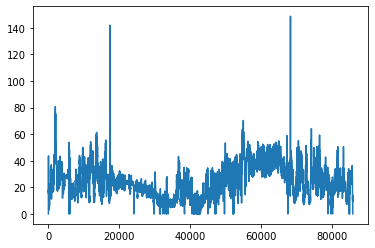

In [129]:
plt.plot(df['current_distance'],df['speed'])

In [130]:
avg_speed = 0
for e in df['speed']:
  avg_speed = avg_speed+e
avg_speed = avg_speed/len(df['speed'])

print(avg_speed)

18.731840640349315
